# 数据读入与查看

In [152]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [10]:
# 读取前五行数据
data = pd.read_csv('datasets.csv',encoding='gbk')
data.head()

,时间,新增,总确诊,治愈,死亡
0,2020.1.28,0,5,0,0
1,2020.1.29,0,5,0,0
2,2020.1.30,1,6,0,0
3,2020.1.31,0,6,0,0
4,2020.2.01,1,7,0,0


In [11]:
# 数据集信息，包含数据集大小，列名，类型
data.info()
data.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
时间     226 non-null object
新增     226 non-null int64
总确诊    226 non-null int64
治愈     226 non-null int64
死亡     226 non-null int64
dtypes: int64(4), object(1)
memory usage: 9.0+ KB


array(['时间', '新增', '总确诊', '治愈', '死亡'], dtype=object)

由此得出：疫情数据中共有226条数据，每条数据包括【‘时间’、‘新增’、‘总确诊’、‘治愈’、‘死亡’】

In [17]:
x = [datetime.datetime.strptime(d, '%Y.%m.%d').date() for d in data['时间']]

In [21]:
y_zeng = []
y_zong = []
y_yu = []
y_si = []
for i in range(len(data['新增'])):
    y_zeng.append(data['新增'][i])
for i in range(len(data['总确诊'])):
    y_zong.append(data['总确诊'][i])
for i in range(len(data['治愈'])):
    y_yu.append(data['治愈'][i])
for i in range(len(data['死亡'])):
    y_si.append(data['死亡'][i])

<Figure size 432x288 with 0 Axes>

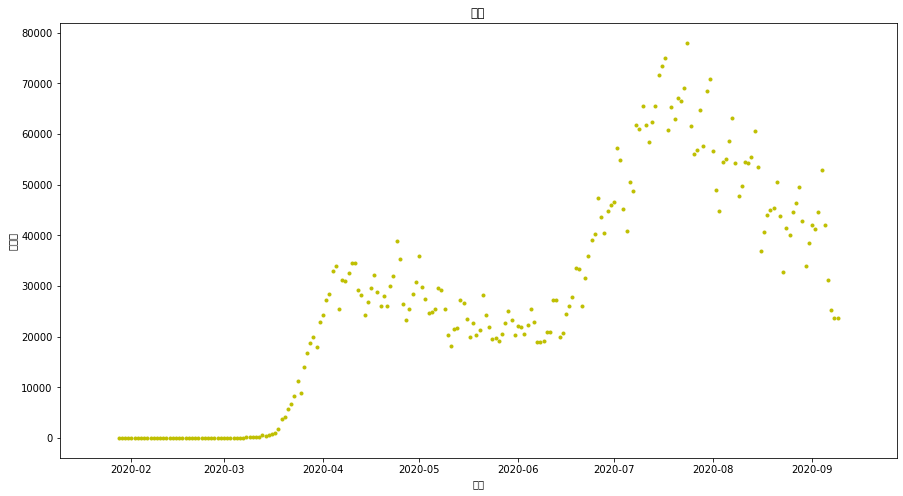

In [41]:
fig = plt.figure()
plt.figure(figsize=(15, 8))
plt.scatter(x,y_zeng,c='y',marker='.')
plt.title("新增")
plt.xlabel("时间")
plt.ylabel("新增数")
plt.show()

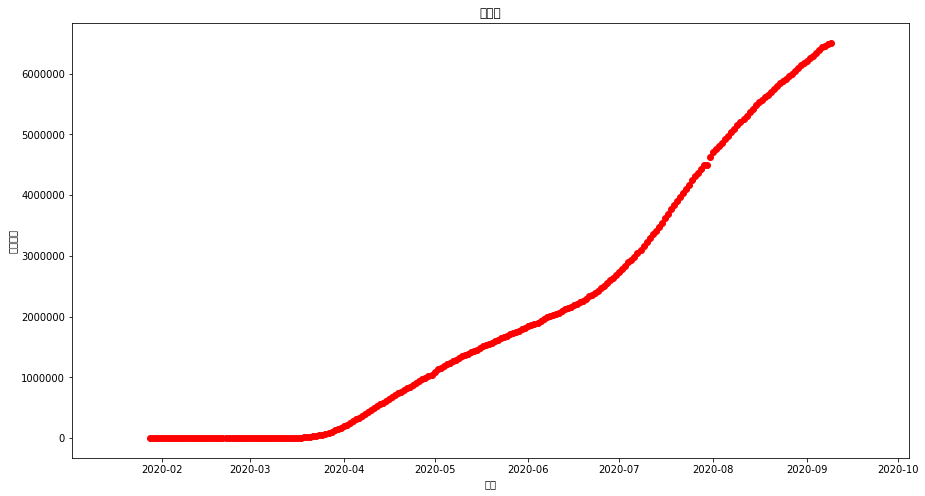

In [42]:
plt.figure(figsize=(15, 8))
plt.scatter(x,y_zong,c='r',marker='o')
plt.title("总确诊")
plt.xlabel("时间")
plt.ylabel("总确诊数")
plt.show()

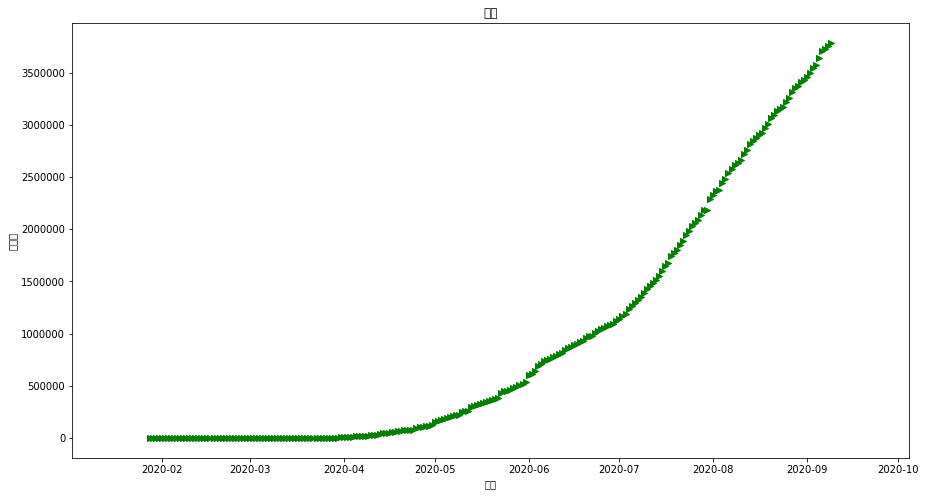

In [43]:
plt.figure(figsize=(15, 8))
plt.scatter(x,y_yu,c='g',marker='>')
plt.title("治愈")
plt.xlabel("时间")
plt.ylabel("治愈数")
plt.show()

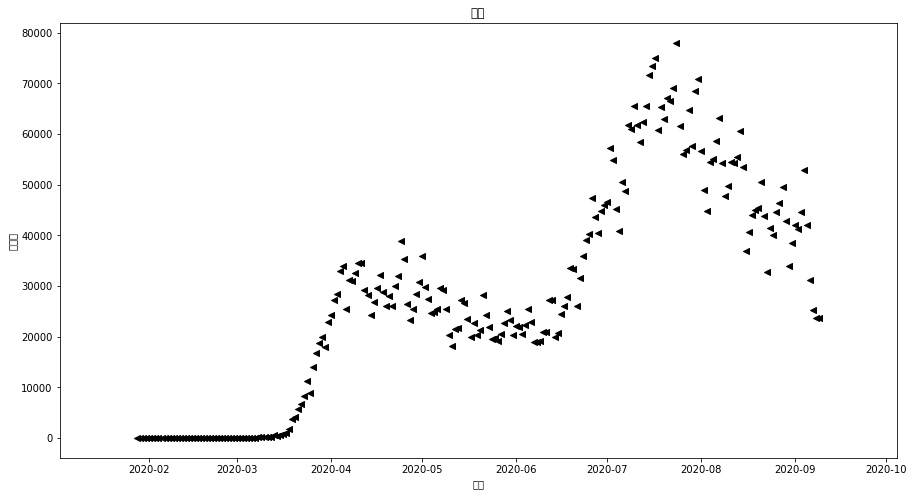

In [44]:
plt.figure(figsize=(15, 8))
plt.scatter(x,y_zeng,c='black',marker='<')
plt.title("死亡")
plt.xlabel("时间")
plt.ylabel("死亡数")
plt.show()

因为我们的任务是：美国新冠肺炎总确诊人数预测，所以：我们要使用**一元线性回归** 进行回归预测任务！

# 线性回归

我们在来看一下时间与总确诊人数的散点图：

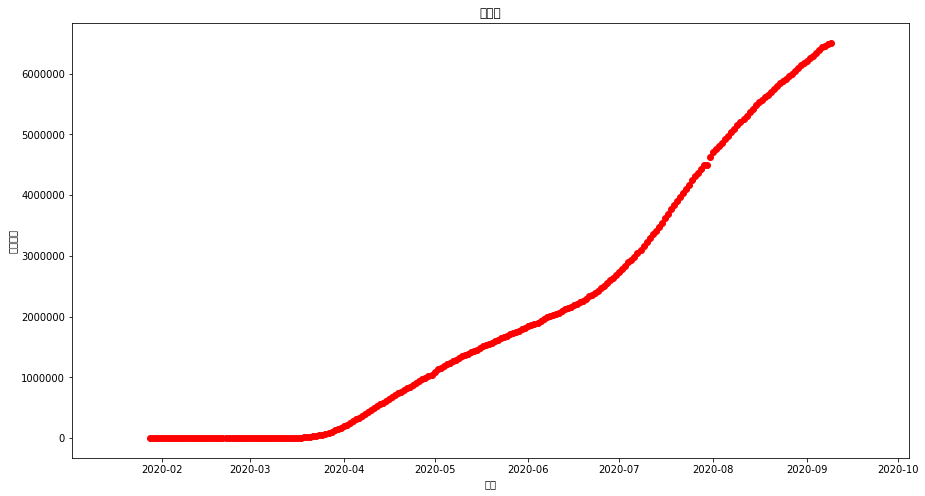

In [45]:
plt.figure(figsize=(15, 8))
plt.scatter(x,y_zong,c='r',marker='o')
plt.title("总确诊")
plt.xlabel("时间")
plt.ylabel("总确诊数")
plt.show()

可以看到有**时间**和**总确诊人数**有很明显的线性正相关关系，下面我们来建立线性模型。

In [113]:
x_trans = [p+1 for p in range(226)]
x_transs = np.array(x_trans)

In [125]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_transs.reshape(-1,1),y_zong)

print('Intercept（截距）：',lr.intercept_)
print('Coefficient（斜率）：',lr.coef_)

Intercept（截距）： -1323928.9755175246
Coefficient（斜率）： [30321.03828779]


In [126]:
w = lr.coef_[0]
b = lr.intercept_
print(b)
print(w)

-1323928.9755175246
30321.038287786057


In [135]:
y_result = []
for j in range(len(x_trans)):
    y_ji = 30321.038287786057*float(x_trans[j])-1323928.9755175246
    y_result.append(y_ji)

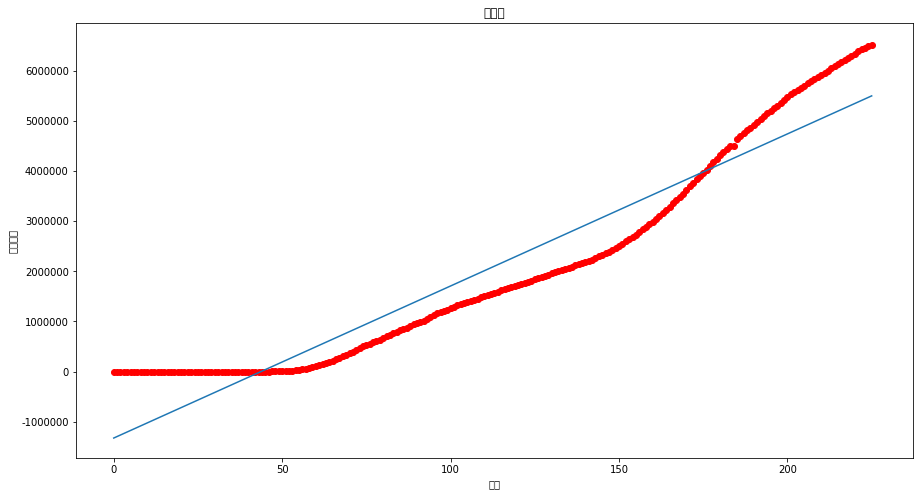

In [136]:
plt.figure(figsize=(15, 8))
for z in range(226):
    plt.scatter(x_trans[z], y_zong[z],c='r',marker='o')
plt.plot(x_trans,y_result)
plt.title("总确诊")
plt.xlabel("时间")
plt.ylabel("总确诊数")
plt.show()

我们可以看到拟合效果并不是很好，接下来我们进行模型的优化：
- 划分训练集和测试集进行重新训练
- 加入$x^2$ 项

## 调优

### 数据集进行划分

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x_trans, y_zong, test_size=0.2, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [141]:
lr_plus = LinearRegression()
lr_plus.fit(X_train.reshape(-1, 1),y_train)

print('Intercept（截距）：',lr_plus.intercept_)
print('Coefficient（斜率）：',lr_plus.coef_)

Intercept（截距）： -1355896.2751308677
Coefficient（斜率）： [30837.97098932]


In [146]:
y_pred = lr_plus.predict(X_test.reshape(-1, 1))
print('MSE：',mean_absolute_error(y_test,y_pred))
print('R2：',r2_score(y_test,y_pred))

MSE： 573797.9799220789
R2： 0.8758266423401028


可以看到评价指标R2为0.87，效果比较好

### 添加二次项

In [148]:
from sklearn.preprocessing import PolynomialFeatures

ploy_lr = PolynomialFeatures(degree=2)
X_ = ploy_lr.fit_transform(x_transs.reshape(-1, 1))
lr_plus_p = LinearRegression()
lr_plus_p.fit(X_,y_zong)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
print('Intercept（截距）：',lr_plus_p.intercept_)
print('Coefficient（斜率）：',lr_plus_p.coef_)

Intercept（截距）： 2353.4062301886734
Coefficient（斜率）： [    0.         -5204.38265188   157.89075973]


In [151]:
y_pred2 = lr_plus_p.predict(ploy_lr.fit_transform(X_test.reshape(-1, 1)))
print('MSE：',mean_absolute_error(y_test,y_pred2))
print('R2：',r2_score(y_test,y_pred2))

MSE： 125014.93667407338
R2： 0.9931908418511977


添加二次项之后会发现评价指标R2为：0.99,效果更好了！